In [1]:
from thinkdsp import *
import os
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
import cv2
from tqdm import tqdm
from PIL import Image
import thinkdsp as tp
HOME = os.getcwd()

In [2]:
# the data
AUDIO_TRAIN = os.path.join(HOME, 'a4', 'train_audio')
AUDIO_TEST = os.path.join(HOME, 'a4', 'test_audio')
SPEC_TRAIN = os.path.join(HOME, 'a4', 'train_spec')
SPEC_TEST = os.path.join(HOME, 'a4', 'test_spec')
MODEL_PATH = os.path.join(HOME, 'a4', 'my_model')

In [3]:
from glob import glob
def wave_to_png(file_path, save_file:str=None, show=False):
    wave = tp.read_wave(file_path)
    spectrogram = wave.make_spectrogram(seg_length=1024)
    spectrogram.plot(high=5000)
    plt.axis('off')
    if save_file is not None:
        plt.savefig(save_file, bbox_inches='tight', pad_inches=0)
    if show:
        plt.show()

In [4]:
def wave_to_png(file_path, save_file:str=None, show=False):
    wave = tp.read_wave(file_path)
    spectrogram = wave.make_spectrogram(seg_length=1024)
    spectrogram.plot(high=5000)
    plt.axis('off')
    if save_file is not None:
        plt.savefig(save_file, bbox_inches='tight', pad_inches=0)
    if show:
        plt.show()

test_audio_files = glob(os.path.join(AUDIO_TEST, '*/*.wav'))
print(test_audio_files[:4])


['c:\\Users\\bouab\\DEV\\Towards_Data_Science\\signal_processing\\uni_course\\assignment_4\\a4\\test_audio\\down\\cd7f8c1b_nohash_0.wav', 'c:\\Users\\bouab\\DEV\\Towards_Data_Science\\signal_processing\\uni_course\\assignment_4\\a4\\test_audio\\down\\cd7f8c1b_nohash_2.wav', 'c:\\Users\\bouab\\DEV\\Towards_Data_Science\\signal_processing\\uni_course\\assignment_4\\a4\\test_audio\\down\\cdbd6969_nohash_0.wav', 'c:\\Users\\bouab\\DEV\\Towards_Data_Science\\signal_processing\\uni_course\\assignment_4\\a4\\test_audio\\down\\cdbd6969_nohash_1.wav']


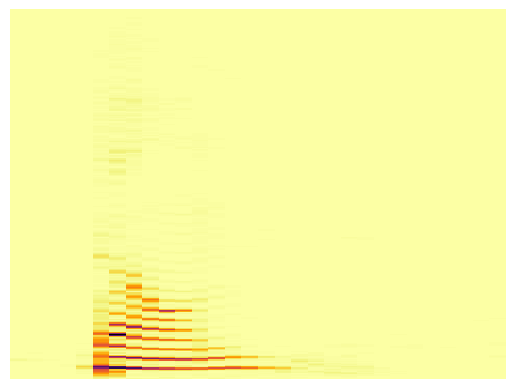

In [5]:
# let's create the spcs images for the test audio files
for file in test_audio_files:
    # create the absoluate path
    path = os.path.join(AUDIO_TEST, file)
    label = os.path.basename(Path(path).parent)
    # extract the class name
    des_path = os.path.join(SPEC_TEST, label, os.path.basename(file)[:-4] + '.png')
    # print(des_path)
    # break
    wave_to_png(path, des_path)
    break

{'right', 'no', 'stop', 'yes', 'down', 'left', 'go', 'up'}
['c:\\Users\\bouab\\DEV\\Towards_Data_Science\\signal_processing\\uni_course\\assignment_4\\a4\\test_audio\\right\\f953e1af_nohash_3.wav', 'c:\\Users\\bouab\\DEV\\Towards_Data_Science\\signal_processing\\uni_course\\assignment_4\\a4\\test_audio\\no\\e0315cf6_nohash_1.wav', 'c:\\Users\\bouab\\DEV\\Towards_Data_Science\\signal_processing\\uni_course\\assignment_4\\a4\\test_audio\\stop\\e6515415_nohash_0.wav', 'c:\\Users\\bouab\\DEV\\Towards_Data_Science\\signal_processing\\uni_course\\assignment_4\\a4\\test_audio\\yes\\ceaadb24_nohash_2.wav', 'c:\\Users\\bouab\\DEV\\Towards_Data_Science\\signal_processing\\uni_course\\assignment_4\\a4\\test_audio\\down\\d1a4fb3f_nohash_0.wav', 'c:\\Users\\bouab\\DEV\\Towards_Data_Science\\signal_processing\\uni_course\\assignment_4\\a4\\test_audio\\left\\fac74f6a_nohash_0.wav', 'c:\\Users\\bouab\\DEV\\Towards_Data_Science\\signal_processing\\uni_course\\assignment_4\\a4\\test_audio\\go\\cc6ee39b_

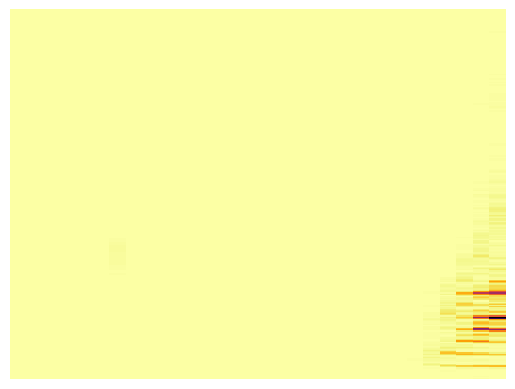

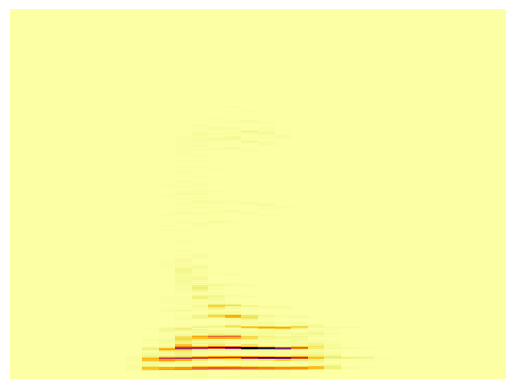

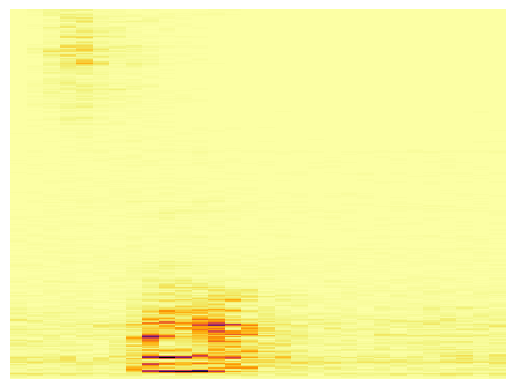

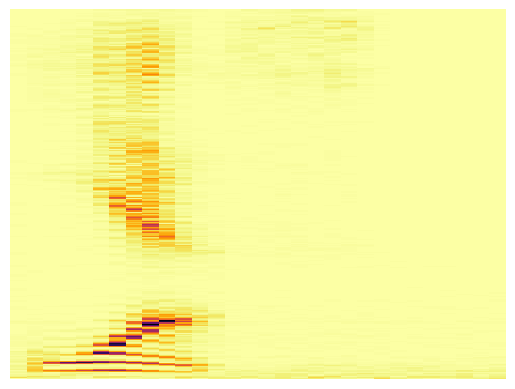

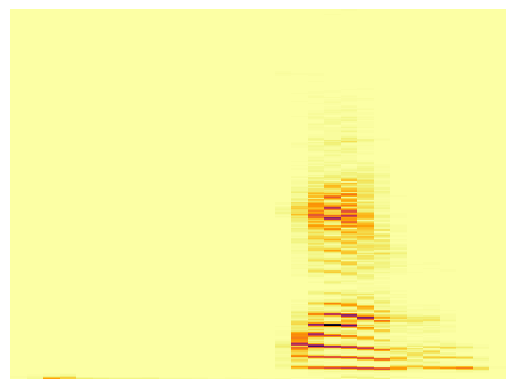

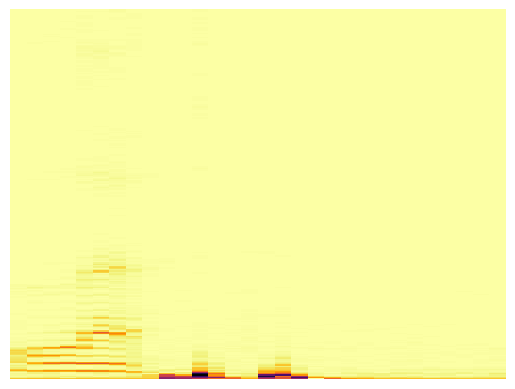

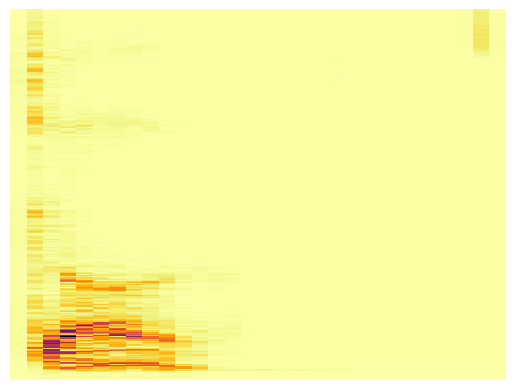

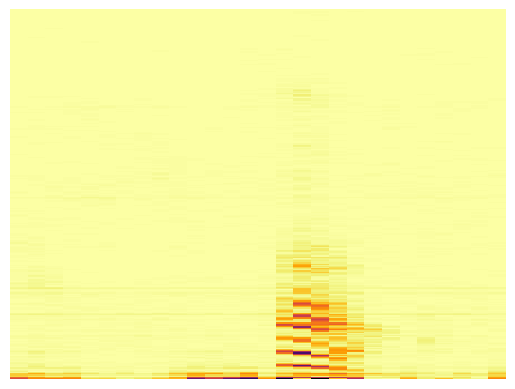

In [13]:
labels = set([os.path.basename(Path(f).parent) for f in test_audio_files])
print(labels)

from random import sample
random_samples = []

for l in labels:
    random_samples.extend(sample(glob(os.path.join(AUDIO_TEST, l, '*.wav')), 1))

print(random_samples)

# let's see how things work
for f in random_samples:
    w = tp.read_wave(f)
    display(w.make_audio())
    wave_to_png(f, show=True)

Some of the audio files are clear, some are a bit noisy. Nevertheless, the spectograms seems distinguishable enough and most probably ANN can extract features elaborate enough to classify the audio

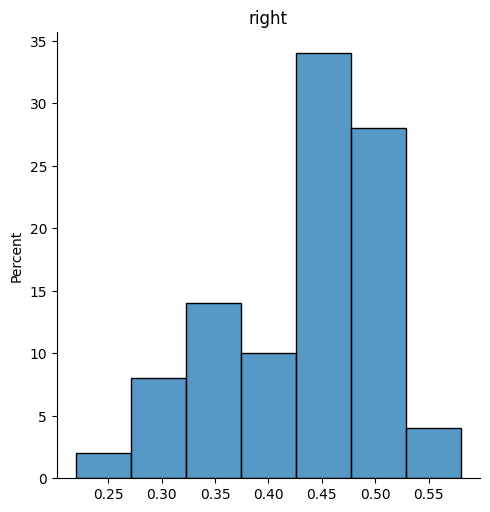

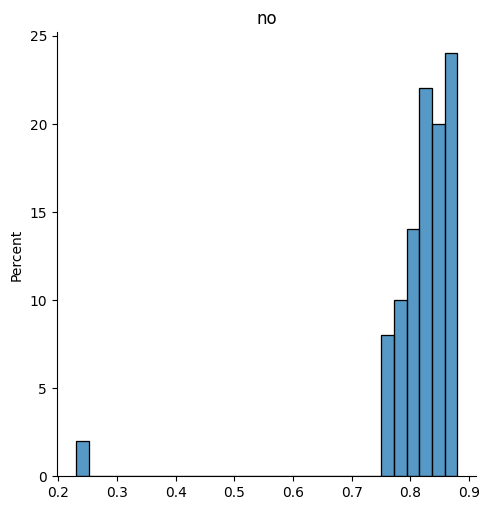

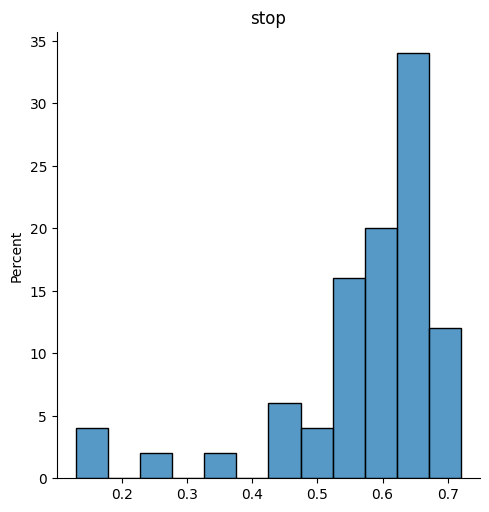

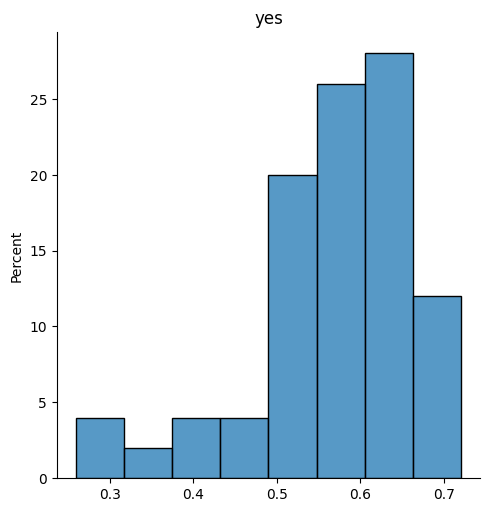

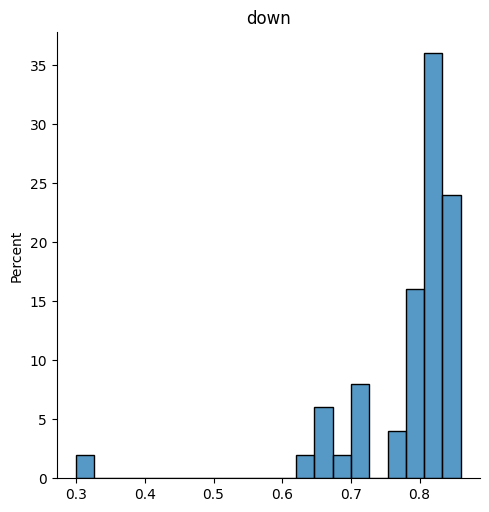

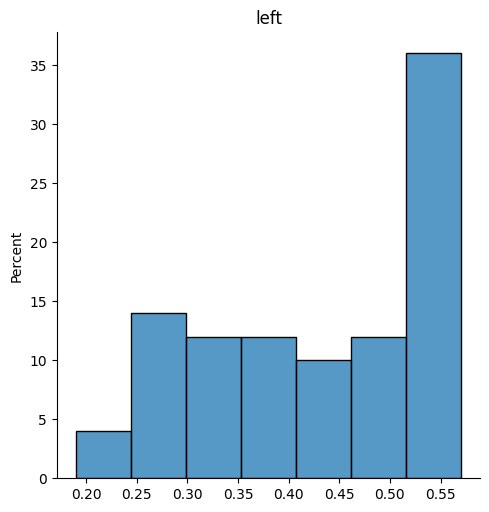

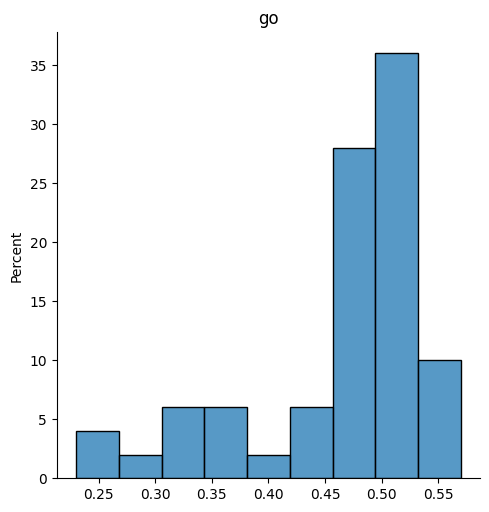

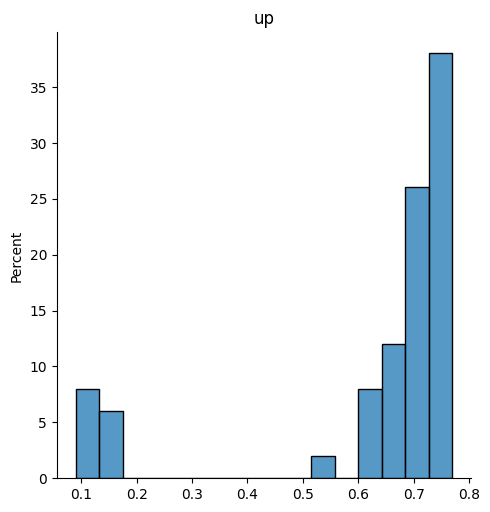

In [15]:
# one possible important characteristic of a sound might be the frequencies peaks in the associated spectogram
# let's have an idea how frequent such files 

import pandas as pd
import seaborn as sns

def check_peaks(label: str):
    # extract the audio files with such label
    files = glob(os.path.join(AUDIO_TEST, label, '*.wav'))
    # get a good sample of size 500
    samples = sample(files, min(50, len(files)))
    # let's consider highest 100 peaks
    def get_sample_peaks(s):
        w = tp.read_wave(s)
        spec = w.make_spectrum()
        peaks = spec.peaks()
        # store the frequencies associated with the peaks
        peaks = [p[1] for p in peaks[:50]]
        return peaks
    # let's see the average correlation between the extracted peaks
    peaks_df = pd.DataFrame(data=np.array([get_sample_peaks(s) for s in samples]))            
    corr_abs = np.abs(peaks_df.corr(numeric_only=True))
    median = np.median(corr_abs, axis=0)
    return [round(m, 2) for m in median]

for v in labels:
    d = check_peaks(v)
    sns.displot(d, stat='percent')
    plt.title(v)
    plt.show()

As the data is quite large, not all data was smoothly downloaded to my local machine (several issues with Yandex). Nevertheless, with the sample data provided, we can see that the peak frequencies seem like quite distinguishable features of the word classes.

The next step is to consider the timestamps of each wav file. As we are constrained to changin a maximum of $15\%$, it is quite important to have a better understanding of the possible parts to **attack** on the spectrogram. 

In [8]:
def wav_length(wav):
    wav = str(wav)
    wave = read_wave(wav)
    return wave.ys.shape[0]

In each audiofile 15% is 

In [10]:
wavs = Path(AUDIO_TEST).rglob("*.wav")
ls = list(map(wav_length, wavs))
print("Test 15% lengths:", min(ls) * .15, max(ls) * .15)

Test 15% lengths: 1126.5 2400.0


0it [00:00, ?it/s]


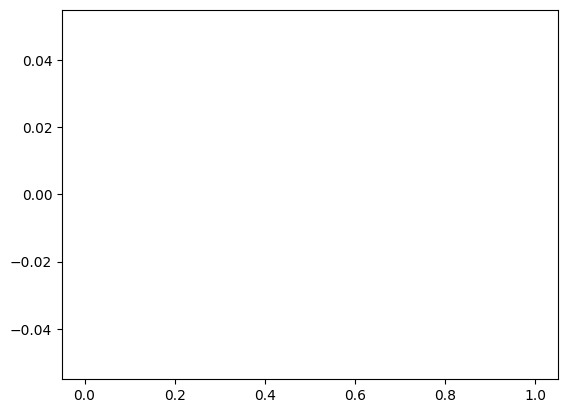

In [11]:
def frac_changed(path):
    
    wave = read_wave(str(path))

    spectrogram = wave.make_spectrogram(seg_length=1024)
    spectrogram.spec_map[k].hs = np.random.randn(*spectrogram.spec_map[k].hs.shape)
    new_wave = spectrogram.make_wave()

    pad_shape = (0, wave.ys.shape[0] - new_wave.ys.shape[0])
    return 1 - np.isclose(wave.ys, np.pad(new_wave.ys, pad_shape)).sum() / wave.ys.shape[0]

wavs = list(Path('train_audio').rglob("*.wav"))
fracs = list(map(frac_changed, tqdm(wavs)))
plt.hist(fracs)
plt.show()

## Playing with the pretrained model

In [ ]:
l = []
for cls in os.listdir(AUDIO_TRAIN):
    print(cls)
    path = os.path.join(AUDIO_TRAIN, cls)
    path = os.path.join(path, os.listdir(path)[0])
    wave = read_wave(path)
    display(wave.make_audio())
    
    spectrogram = wave.make_spectrogram(seg_length=1024)
    fig, axs, img, array, ts, fs = spectrogram.plot(high=5000)
    break

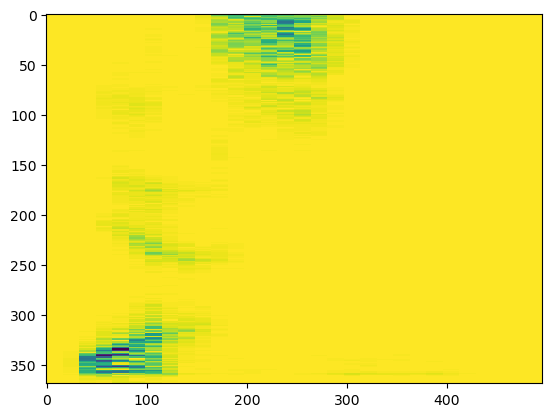

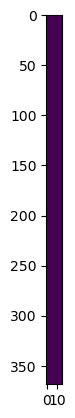

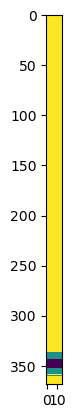

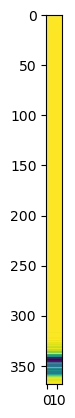

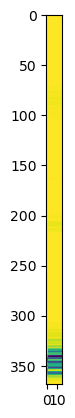

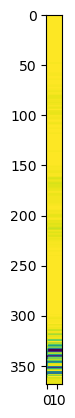

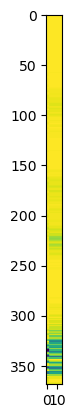

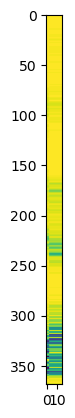

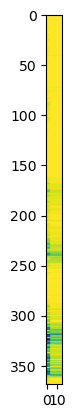

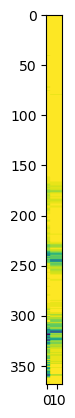

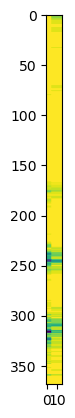

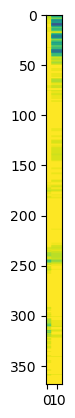

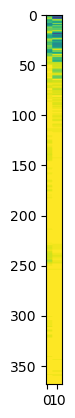

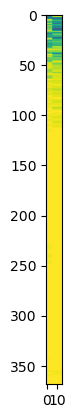

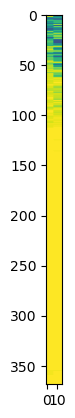

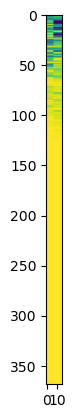

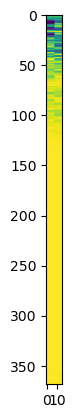

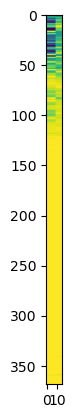

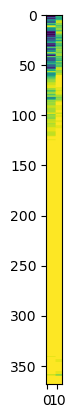

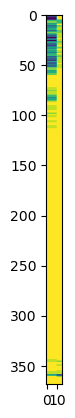

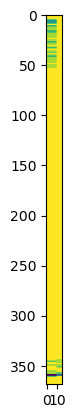

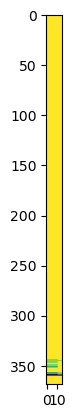

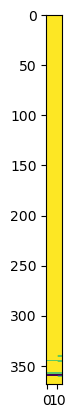

In [ ]:
model = keras.models.load_model(MODEL_PATH)
arr = np.uint8(img.numpy()[0]*255)
arr = np.asarray(Image.fromarray(arr).convert("L"))

plt.imshow(arr)
plt.show()
for i in range(0, 369-30, 16):
    plt.imshow(arr[:, i:i+16])
    plt.show()

In [ ]:
classes = os.listdir('train_spec')
wave = read_wave('test_audio/yes/cc6ee39b_nohash_3.wav')
with Image.open('test_spec/yes/0.png') as img:
    img = tf.convert_to_tensor(img)[None, :,:,:3] / 255
    
    with tf.GradientTape() as tape:
        tape.watch(img)
        probs = model(img)
        cls = tf.math.argmax(probs[0])
        loss = probs[0, cls]
        
    grad = tape.gradient(loss, img)
    grad

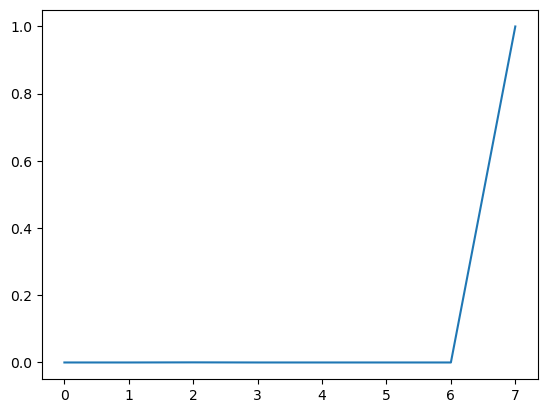

In [ ]:
plt.plot(out[0])
plt.show()

To generate an adversarial example directly from audio, I need to have a differentiable STFT.

In [ ]:
stft = tf.signal.stft(wave.ys, 
                      frame_length=1024, frame_step=512,
                      window_fn=tf.signal.hamming_window)
stft = stft[:, :int(stft.shape[1] * 5000 / (wave.ys.shape[0] // 2))]

In [ ]:
stft.shape

TensorShape([30, 320])

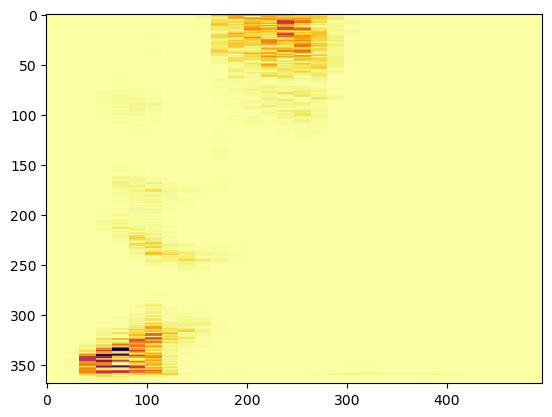

In [ ]:
plt.imshow(img.numpy()[0], cmap='gray')
plt.show()

/tmp/ipykernel_23450/3867528778.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = matplotlib.cm.get_cmap(cmap if cmap is not None else 'gray')


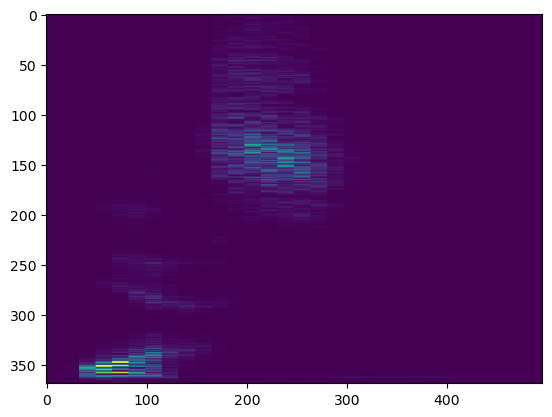

In [ ]:
ttt = tf.math.abs(stft)#[:,:,None]
ttt = tf.transpose(ttt)[:,:,None][::-1]
ttt = tf.repeat(ttt, 16, axis=1)
ttt = tf.image.resize(ttt, (369, 496))
c_ttt = colorize(ttt, cmap='inferno_r')
plt.imshow(ttt)
plt.show()

In [ ]:
import matplotlib

def colorize(value, vmin=None, vmax=None, cmap=None):
        """
        A utility function for TensorFlow that maps a grayscale image to a matplotlib
        colormap for use with TensorBoard image summaries.
        Arguments:
          - value: 2D Tensor of shape [height, width] or 3D Tensor of shape
            [height, width, 1].
          - vmin: the minimum value of the range used for normalization.
            (Default: value minimum)
          - vmax: the maximum value of the range used for normalization.
            (Default: value maximum)
          - cmap: a valid cmap named for use with matplotlib's `get_cmap`.
            (Default: 'gray')
        Example usage:
        ```
        output = tf.random_uniform(shape=[256, 256, 1])
        output_color = colorize(output, vmin=0.0, vmax=1.0, cmap='plasma')
        tf.summary.image('output', output_color)
        ```

        Returns a 3D tensor of shape [height, width, 3].
        """

        # normalize
        vmin = tf.reduce_min(value) if vmin is None else vmin
        vmax = tf.reduce_max(value) if vmax is None else vmax
        value = (value - vmin) / (vmax - vmin) # vmin..vmax

        # squeeze last dim if it exists
        value = tf.squeeze(value)

        # quantize
        indices = tf.cast(tf.round(value * 255), tf.int32)

        # gather
        cm = matplotlib.cm.get_cmap(cmap if cmap is not None else 'gray')
        colors = tf.constant(cm.colors, dtype=tf.float32)
        value = tf.gather(colors, indices)

        return value

/tmp/ipykernel_23450/3867528778.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = matplotlib.cm.get_cmap(cmap if cmap is not None else 'gray')


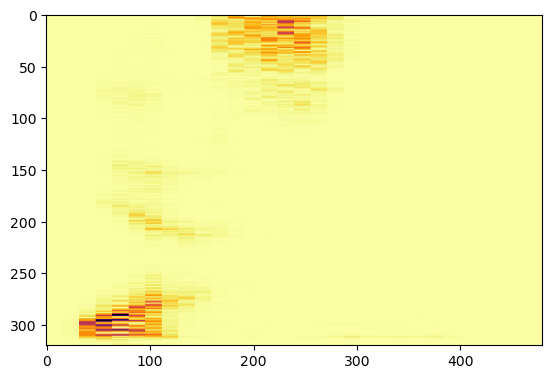

In [ ]:
plt.imshow(colorize(ttt, cmap='inferno_r'))
plt.show()

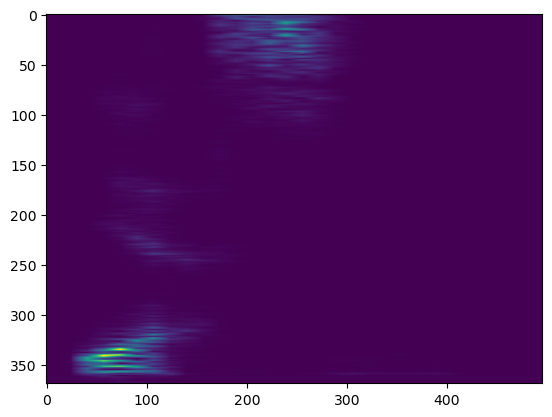

In [ ]:
ttt = tf.math.abs(stft)#[:,:,None]
ttt = tf.transpose(ttt)[:,:,None][::-1]
plt.imshow(tf.image.resize(ttt, (369, 496)).numpy()[:,:,0])
plt.show()

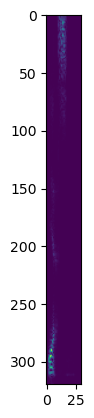

(369, 496)


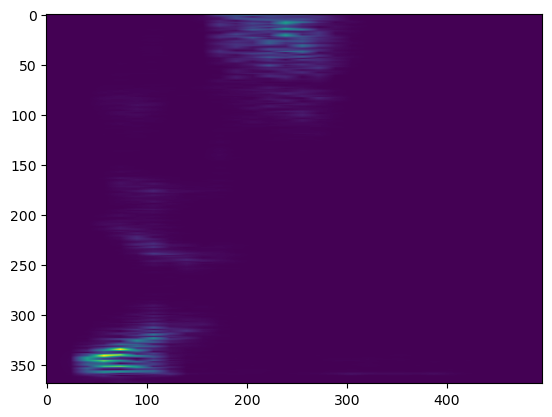

In [ ]:
plt.imshow(np.abs(stft.numpy()).T[::-1])
plt.show()
im = cv2.resize(np.abs(stft.numpy()).T[::-1], (496, 369), 0, 0, cv2.INTER_NEAREST)
print(im.shape)
plt.imshow(im)
plt.show()

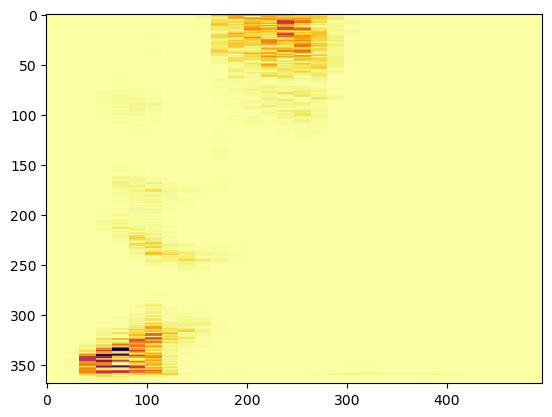

In [ ]:
plt.imshow(img.numpy()[0], cmap='gray')
plt.show()

Visually two spectrograms (from thinkdsp and from tf) are indistiguishable. They have the same shape. The largest absolute error between corresponding values of each spectrogram is .147, which is okay for my purposes. Let's see later on performance.

Largest absolute error: 0.147
Shapes. TF: (513, 30); Thinkdsp: (513, 30)


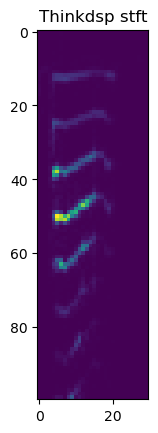

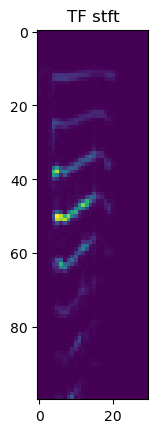

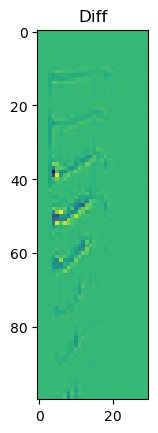

In [ ]:
err = spectrogram.get_data() - np.abs(stft.numpy()).T
err = np.abs(err).max()
print("Largest absolute error: %.3f" % (err, ))
print(f"Shapes. TF: {np.abs(stft.numpy()).T.shape}; Thinkdsp: {spectrogram.get_data().shape}")
plt.imshow(spectrogram.get_data()[:100])
plt.title("Thinkdsp stft")
plt.show()
plt.imshow(np.abs(stft.numpy()).T[:100])
plt.title("TF stft")
plt.show()
plt.imshow(spectrogram.get_data()[:100] - np.abs(stft.numpy()).T[:100])
plt.title("Diff")
plt.show()

And I can inded take a gradient w.r.t. the input using tf's stft.

In [ ]:
c_ttt.shape

TensorShape([369, 496, 3])

In [ ]:
inp = tf.convert_to_tensor(wave.ys)
with tf.GradientTape() as tape:
    tape.watch(inp)
    stft = tf.signal.stft(inp, 
                          frame_length=1024, frame_step=512,
                          window_fn=tf.signal.hamming_window)
    stft = stft[:, :int(stft.shape[1] * 5000 / (wave.ys.shape[0] // 2))]
    ttt = tf.math.abs(stft)#[:,:,None]
    ttt = tf.transpose(ttt)[:,:,None][::-1]
    ttt = tf.repeat(ttt, 16, axis=1)
    ttt = tf.image.resize(ttt, (369, 496))
    tape.watch(ttt)
    c_ttt = colorize(ttt, cmap='inferno_r')[None]
#     plt.imshow(c_ttt.numpy()[0])
#     plt.show()
    tape.watch(c_ttt)
    
    probs = model(c_ttt)
    print(probs)
    loss = probs[0, 7]

grad = tape.gradient(loss, ttt)
grad

tf.Tensor(
[[1.6682291e-11 6.2910170e-11 7.3095196e-04 8.6705906e-11 1.5999079e-07
  6.1136979e-07 6.1952989e-07 9.9926776e-01]], shape=(1, 8), dtype=float32)


/tmp/ipykernel_23450/3867528778.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = matplotlib.cm.get_cmap(cmap if cmap is not None else 'gray')


In [ ]:
grad

In [ ]:

test_ds = tf.keras.utils.audio_dataset_from_directory(
    directory='test_audio',
    batch_size=1,
    seed=0,
    output_sequence_length=16000)

Found 1599 files belonging to 8 classes.


In [ ]:

def tf_stft(x, y):
    x = tf.squeeze(x, axis=-1)
    print(tf.reduce_min(x), tf.reduce_max(x))

    print(1, x.shape)
    stft = tf.signal.stft(x, 
                          frame_length=1024, frame_step=512,
                          window_fn=tf.signal.hamming_window)
    stft = stft[:, :, :int(stft.shape[2] * 5000 / (x.shape[1] // 2))]
    print(2, stft.shape)
    stft = tf.math.abs(stft)#[:,:,None]
    print(2.5, stft.shape)
    stft = tf.repeat(stft, 16, axis=1)
    print(3, stft.shape)
    stft = tf.transpose(stft, perm=[2,1,0])[::-1]
    stft = tf.image.resize(stft, (369, 496))
    stft = tf.transpose(stft, perm=[2,0,1])
    
#     print(4, stft.shape)
    stft = tf.expand_dims(stft, -1)
#     print(5, stft.shape)
    stft = tf.image.grayscale_to_rgb(stft)
    print(6, stft.shape)
    
    return stft, tf.one_hot(y, 8)


test_ds = tf.keras.utils.audio_dataset_from_directory(
    directory='train_audio',
    batch_size=64,
    seed=0,
    output_sequence_length=16000)

test_ds = test_ds.map(tf_stft)#, tf.data.AUTOTUNE)

Found 6398 files belonging to 8 classes.
Tensor("Min:0", shape=(), dtype=float32) Tensor("Max:0", shape=(), dtype=float32)
1 (None, 16000)
2 (None, 30, 320)
2.5 (None, 30, 320)
3 (None, 480, 320)
6 (None, 369, 496, 3)


In [ ]:
import keras.backend as K

pretrained_model = keras.models.load_model('my_model', compile=False)
# Load model but initialize new weights
distilled_model = tf.keras.models.clone_model(
    pretrained_model
)

distilled_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

print(distilled_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 367, 494, 8)       224       
                                                                 
 normalization (Normalizatio  (None, 367, 494, 8)      17        
 n)                                                              
                                                                 
 max_pooling2d (MaxPooling2D  (None, 183, 247, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 181, 245, 16)      1168      
                                                                 
 normalization_1 (Normalizat  (None, 181, 245, 16)     33        
 ion)                                                            
                                                        

In [ ]:
tf.debugging.set_log_device_placement(True)
EPOCHS = 3
BATCH_SIZE = 64
history = model.fit(test_ds,
                    epochs=EPOCHS,
                    validation_data=test_ds,
                    verbose=1
                    )

(1, 16000, 1)
(1,)
tf.Tensor(-0.31463623, shape=(), dtype=float32) tf.Tensor(0.39108276, shape=(), dtype=float32)
1 (1, 16000)
2 (1, 30, 320)
2.5 (1, 30, 320)
3 (1, 480, 320)


2023-04-15 22:14:32.558676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1599]
	 [[{{node Placeholder/_4}}]]
2023-04-15 22:14:32.559247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1599]
	 [[{{node Placeholder/_0}}]]


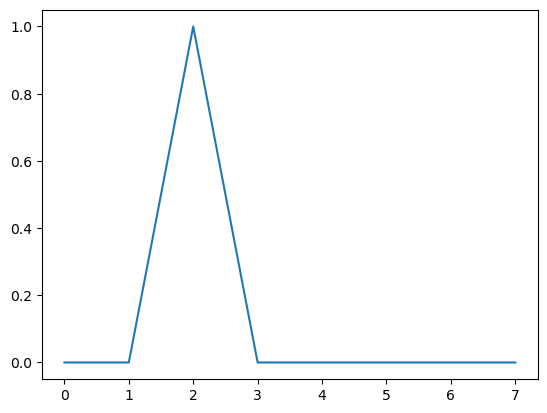

Class: 2
tf.Tensor(-1.3146362, shape=(), dtype=float32) tf.Tensor(1.3910828, shape=(), dtype=float32)
1 (1, 16000)
2 (1, 30, 320)
2.5 (1, 30, 320)
3 (1, 480, 320)


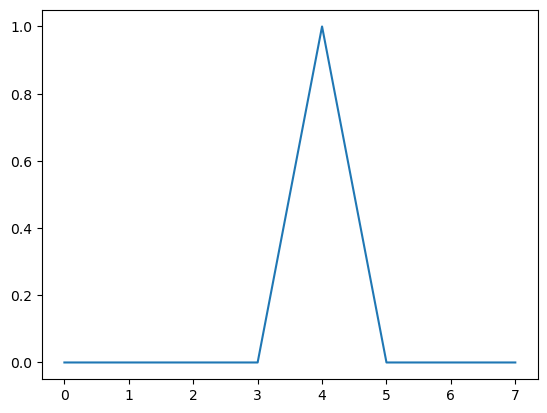

tf.Tensor(-1.3146362, shape=(), dtype=float32) tf.Tensor(1.3910828, shape=(), dtype=float32)
1 (1, 16000)
2 (1, 30, 320)
2.5 (1, 30, 320)
3 (1, 480, 320)


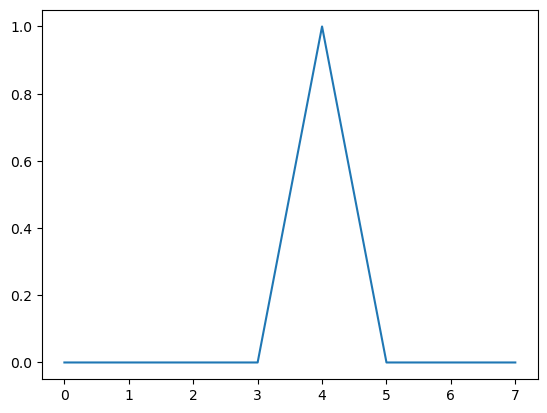

Class: 4
tf.Tensor(-1.3146362, shape=(), dtype=float32) tf.Tensor(1.3910828, shape=(), dtype=float32)
1 (1, 16000)
2 (1, 30, 320)
2.5 (1, 30, 320)
3 (1, 480, 320)


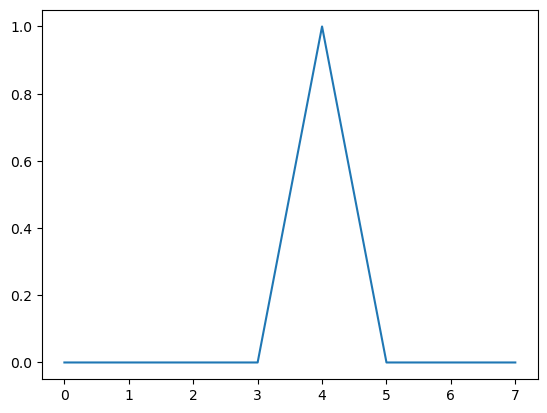

tf.Tensor(-1.3146362, shape=(), dtype=float32) tf.Tensor(1.3910828, shape=(), dtype=float32)
1 (1, 16000)
2 (1, 30, 320)
2.5 (1, 30, 320)
3 (1, 480, 320)


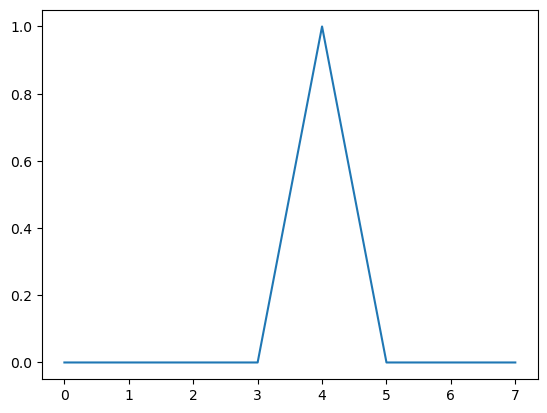

Class: 4
tf.Tensor(-1.3146362, shape=(), dtype=float32) tf.Tensor(1.3910828, shape=(), dtype=float32)
1 (1, 16000)
2 (1, 30, 320)
2.5 (1, 30, 320)
3 (1, 480, 320)


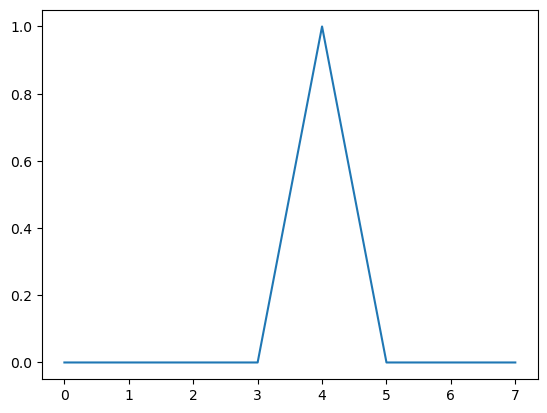

In [ ]:
for example_audio, example_labels in test_ds.take(1):  
#     print(tf.reduce_min(example_audio).numpy(), tf.reduce_max(example_audio).numpy())
    print(example_audio.shape)
    print(example_labels.shape)
    
for i in range(3):
    with tf.GradientTape() as tape:
        tape.watch(example_audio)
        example_stft, example_labels_ = tf_stft(example_audio, example_labels)
        probs = model(example_stft)
        plt.plot(probs.numpy()[0])
        plt.show()
        cls = probs[0].numpy().argmax()
        print("Class:", cls)
        loss = probs[0, cls]

    grad = tape.gradient(loss, example_audio)
    example_audio -= tf.math.sign(grad)

    example_stft, example_labels_ = tf_stft(example_audio, example_labels)
    probs = model(example_stft)
    plt.plot(probs.numpy()[0])
    plt.show()

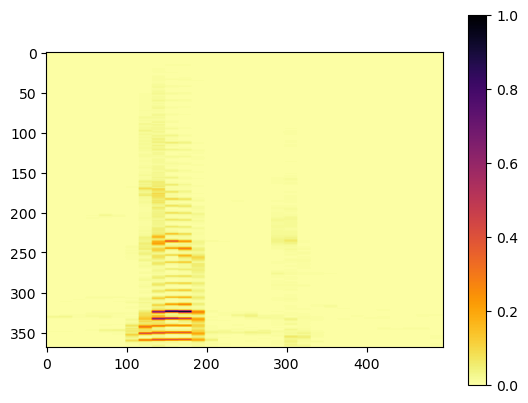

In [ ]:
fig,axs = plt.subplots(1,1)
imshow = axs.imshow(example_audio[0].numpy()[:, :, 0], cmap='inferno_r')
cbar = plt.colorbar(imshow)
fig.show()

In [ ]:
model = keras.models.load_model('my_model')
model.evaluate(test_ds)

2023-04-15 21:55:45.174369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1599]
	 [[{{node Placeholder/_0}}]]
2023-04-15 21:55:45.174663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1599]
	 [[{{node Placeholder/_4}}]]


1599/1599 [==============================] - 8s 5ms/step - loss: 16.3348 - accuracy: 0.1251


[16.33482551574707, 0.12507817149162292]